Introduction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Data Loading

In [ ]:
path = 'heart_attack_nigeria_youth_vs_adult.csv'
df = pd.read_csv(path)
df.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,41,Female,Rural,141.4,182.9,37.4,92,Moderate,False,...,Low,Low,Primary,Single,Urban,False,3,1.3,3,True
1,2,54,Male,Rural,130.4,252.4,17.9,81,Moderate,False,...,Low,Moderate,Higher,Divorced,Rural,False,1,0.9,8,False
2,3,24,Male,Urban,144.8,142.5,31.6,71,Low,True,...,High,Low,Primary,Married,Rural,True,3,2.2,5,False
3,4,59,Female,Suburban,163.1,312.4,11.4,67,Moderate,False,...,Low,Moderate,Secondary,Divorced,Rural,True,5,3.5,10,False
4,5,20,Male,Urban,120.7,298.4,29.3,90,High,True,...,Low,Low,Secondary,Married,Urban,True,4,2.3,6,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    14930 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

In [ ]:
df.describe()

,ID,Age,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Stress_Level,Sleep_Hours,Health_Awareness,Daily_Water_Intake,Mental_Health
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,36.020400,124.730312,209.601122,26.976694,84.504340,5.516740,6.493916,2.998820,2.251884,5.477500
std,14433.901067,14.191716,17.987423,60.128478,6.001402,11.513936,2.873097,1.440283,1.414121,1.013574,2.864685
min,1.000000,12.000000,51.500000,-26.800000,0.500000,65.000000,1.000000,4.000000,1.000000,0.500000,1.000000
25%,12500.750000,24.000000,112.700000,168.900000,23.000000,75.000000,3.000000,5.300000,2.000000,1.400000,3.000000
50%,25000.500000,36.000000,124.700000,209.600000,27.000000,85.000000,6.000000,6.500000,3.000000,2.300000,5.000000
75%,37500.250000,48.000000,136.900000,250.000000,31.000000,94.000000,8.000000,7.700000,4.000000,3.100000,8.000000
max,50000.000000,60.000000,202.400000,437.600000,53.200000,104.000000,10.000000,9.000000,5.000000,4.000000,10.000000


In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [ ]:
df.dtypes

,0
ID,int64
Age,int64
Gender,object
Region,object
Blood_Pressure,float64
Cholesterol,float64
BMI,float64
Heart_Rate,int64
Exercise_Level,object
Smoking,bool


In [ ]:
df.nunique()

,0
ID,50000
Age,49
Gender,3
Region,3
Blood_Pressure,1165
Cholesterol,3410
BMI,426
Heart_Rate,40
Exercise_Level,3
Smoking,2


In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Region,0
Blood_Pressure,0
Cholesterol,0
BMI,0
Heart_Rate,0
Exercise_Level,0
Smoking,0


In [ ]:
df.drop(columns=['Alcohol_Consumption'], inplace=True)

In [ ]:
df.drop(columns=['ID'], inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(50000, 28)

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=["Heart_Attack"])
y = df["Heart_Attack"]

In [ ]:
# Mengidentifikasi fitur kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
# One-Hot Encoding untuk fitur kategorikal
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))



In [ ]:
# Menambahkan kembali fitur numerik
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)
X_numeric = X.drop(columns=categorical_cols).reset_index(drop=True)
X_encoded = pd.concat([X_numeric, X_encoded], axis=1)

In [ ]:
# Membagi dataset kembali setelah normalisasi
# Membagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((40000, 48), (10000, 48))

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

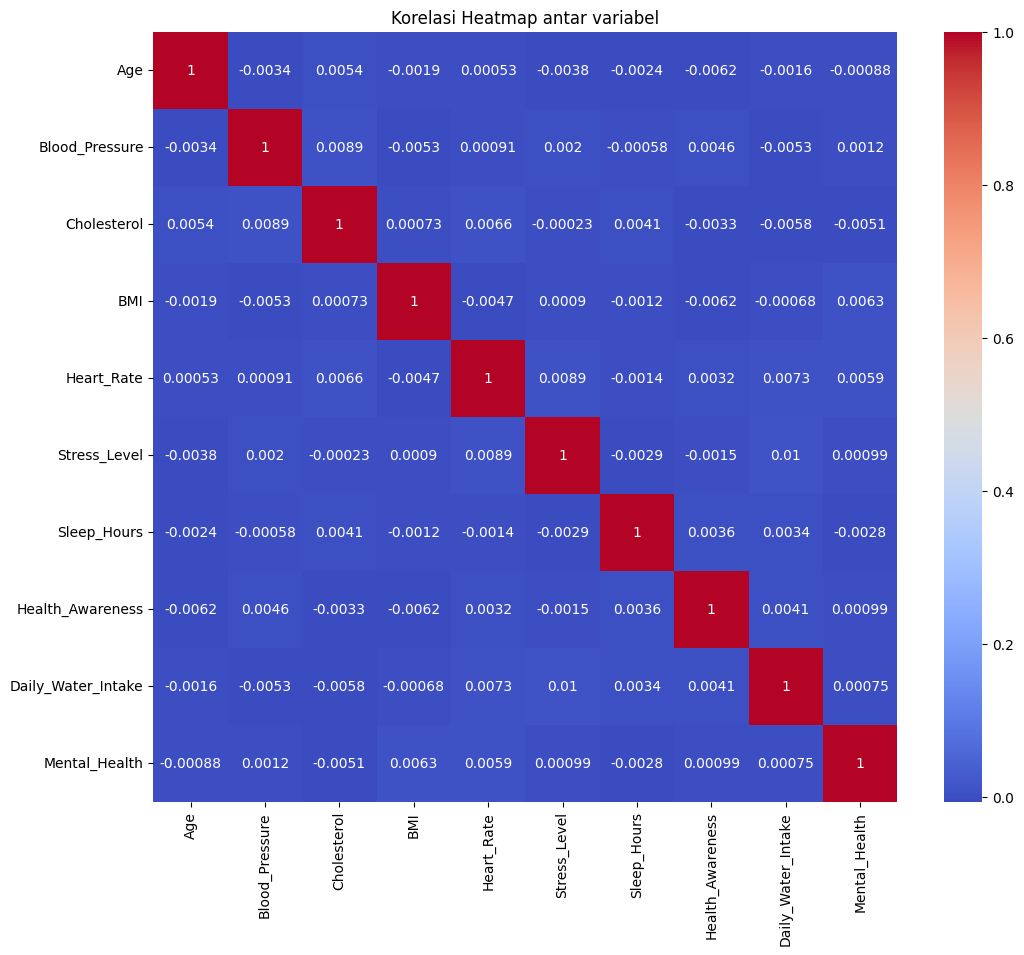

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Heatmap antar variabel')
plt.show()

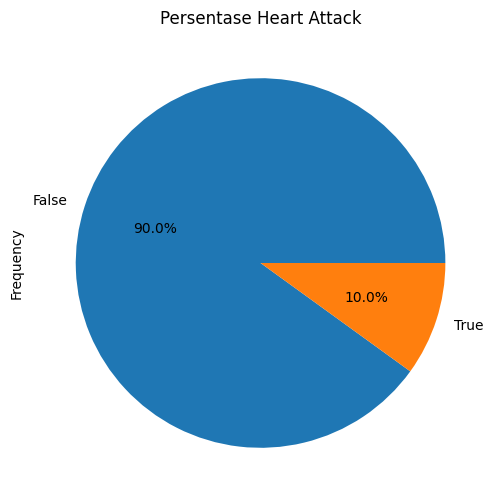

In [ ]:
plt.figure(figsize=(8, 6))
df['Heart_Attack'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Heart Attack')
plt.ylabel('Frequency')
plt.show()

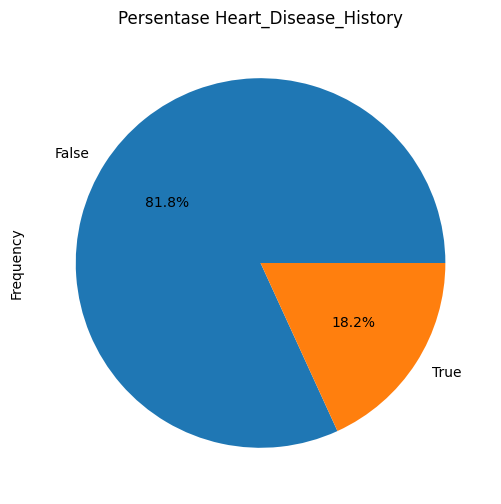

In [ ]:
plt.figure(figsize=(8, 6))
df['Heart_Disease_History'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Heart_Disease_History')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [ ]:
results = {}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }
# Konversi hasil evaluasi ke DataFrame
results_df = pd.DataFrame(results).T
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. 

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.9003,0.000000,0.000000,0.000000
Logistic Regression,0.9003,0.000000,0.000000,0.000000
K-Nearest Neighbors,0.8935,0.085366,0.007021,0.012975
Naive Bayes,0.9003,0.000000,0.000000,0.000000
